## Advanced Plotting

Data visualization (i.e. plotting) is one of the most important aspect in coding as that is the main way you convey important data to your audience. In this section, I will go over important aspects of a plot and how to implented them via code!


First, we will begin by importing the python package for plotting data: "Matplotlib". If you are interested in learning more about Matplotlib beyond this tutorial, you can go to https://matplotlib.org/stable/gallery/index

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

There are two main plotting classes in Matplotlib: Pyplot and Axes. They both have their own pros and cons. Pyplot is sufficient for simple plotting task while Axes is better for more advanced plotting (e.g. subplots, color bars, etc.) First, there is a quick demo of Pyplot as a basics to plotting review, but we will focus on advanced plotting with Axes.

**Pro tip: in general, you want to include the following in your plots: (1) axis titles, (2) plot title, (3) legends** (especially when working with multiple data sets). The commands below show you how to do this!

### Plotting Basics with Pyplot

In [ ]:
## Generating data

x_data1 = np.linspace(0,20,20)
## plot
y_data1 = -(x_data1-10)**2 + 100

## scatter
np.random.seed(143)
y_data2 = np.random.randint(1,high= 100, size = 20)

np.random.seed(2048)
y_data3 = np.random.randint(1,high= 100, size = 20)

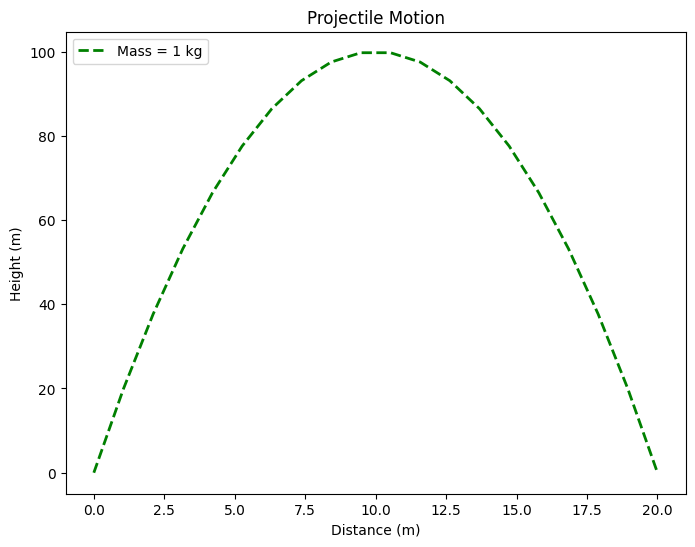

In [ ]:
fig = plt.figure(figsize = (8,6)) ## (width, height)
plt.plot(x_data1,y_data1,color = 'green', linewidth = 2, linestyle = '--', label="Mass = 1 kg")
# plt.xlim(10,20)
plt.xlabel("Distance (m)") ## this sets the x axis label
plt.ylabel("Height (m)") ## this sets the y axis label
plt.title("Projectile Motion") ## this sets the plot title
plt.legend(loc = "upper left") ## this sets the legend
# plt.savefig("projectile_motion.png") ## this saves the figure

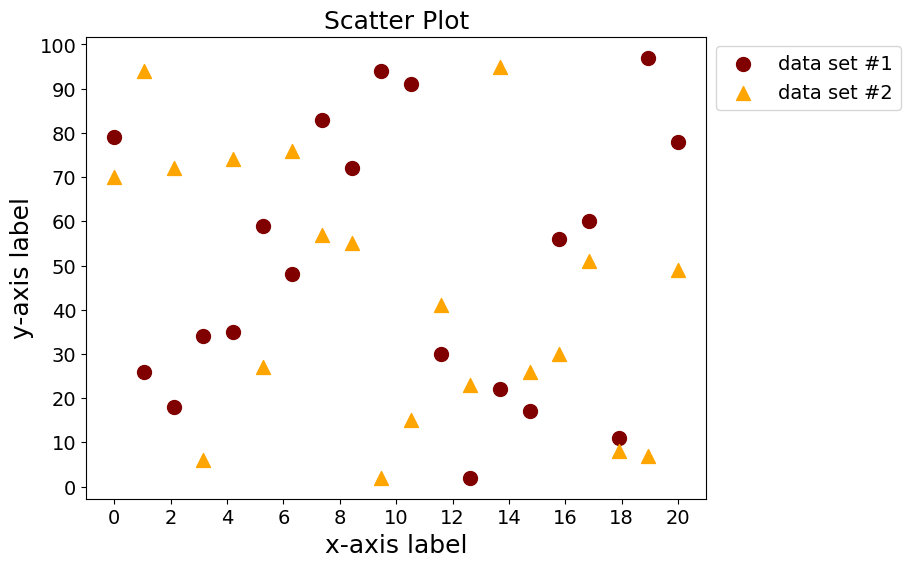

In [ ]:
fig1 = plt.figure(figsize = (8,6)) ## (width, height)
plt.scatter(x_data1,y_data2,color = 'maroon', s = 100,label= "data set #1")
plt.scatter(x_data1,y_data3,color = 'orange', marker = '^', s = 100,label = "data set #2")

plt.xlabel("x-axis label",fontsize = 18)
plt.ylabel("y-axis label",fontsize = 18)
plt.title("Scatter Plot",fontsize = 18)

plt.xticks([0,2,4,6,8,10,12,14,16,18,20],fontsize=14)
plt.yticks([0,10,20,30,40,50,60,70,80,90,100],fontsize=14)
# plt.xticklabels(fontsize = 20)

# plt.legend
# ,fontsize=14)#,loc = "upper right")

### Advanced Plotting with Axes

We can import some helpful functions within the matplotlib package that we can use with Axes.

In [ ]:
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

matplotlib.ticker will let us customize our axes

matplotlib.patches

matplotlib.gridspec will let us add subplots

### One Plot

In [ ]:
lam1 = 1000   # m = 1000A
lam2 = 30000   # m = 30000A (3 microns)
D_WIYN = 0.9e10   # m
D_HST  = 2.4e10   # m
D_KECK = 10.0e10  # m

def res_func(lam, D):
    theta = ((1.22*lam)/D) * 206265
    return theta

lam = np.linspace(lam1,lam2,100000)
lam_ang = np.linspace(np.log10(1000),np.log10(30000),100000)

theta_WIYN = res_func(lam,D_WIYN)
theta_HST = res_func(lam,D_HST)
theta_KECK = res_func(lam,D_KECK)

Text(0.5, 1.0, 'Theoretical Angular Resolution of Telescopes')

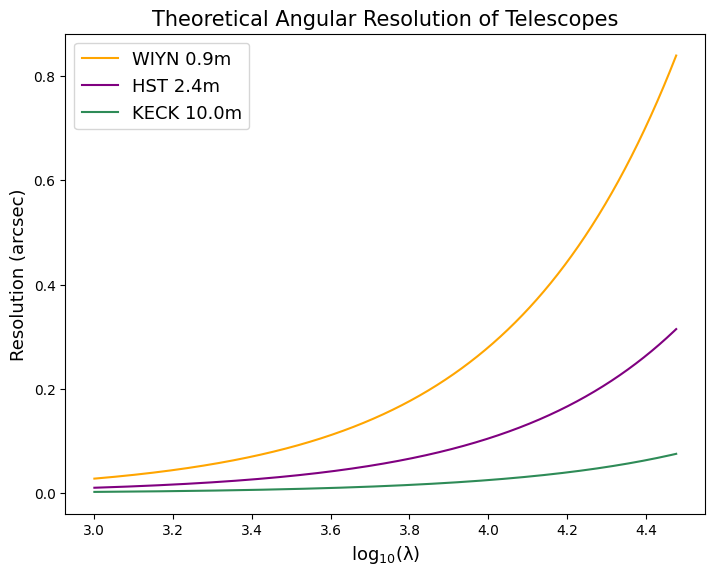

In [ ]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,1,1])

ax0.plot(np.log10(lam),theta_WIYN, color='orange', label = 'WIYN 0.9m')
ax0.plot(np.log10(lam),theta_HST, color='purple', label = 'HST 2.4m')
ax0.plot(np.log10(lam),theta_KECK, color='seagreen', label = 'KECK 10.0m')

## Give the plot its basics
ax0.set_xlabel("log$_{10}$(λ)",fontsize=13) ## x-axis = log10 of wavelength
ax0.set_ylabel("Resolution (arcsec)",fontsize=13)  ## y-axis = angular resolution
ax0.legend(loc="upper left",fontsize=13)
ax0.set_title("Theoretical Angular Resolution of Telescopes",fontsize=15)

### Let's make it fancy!

#### This is where ax is much better than plt.

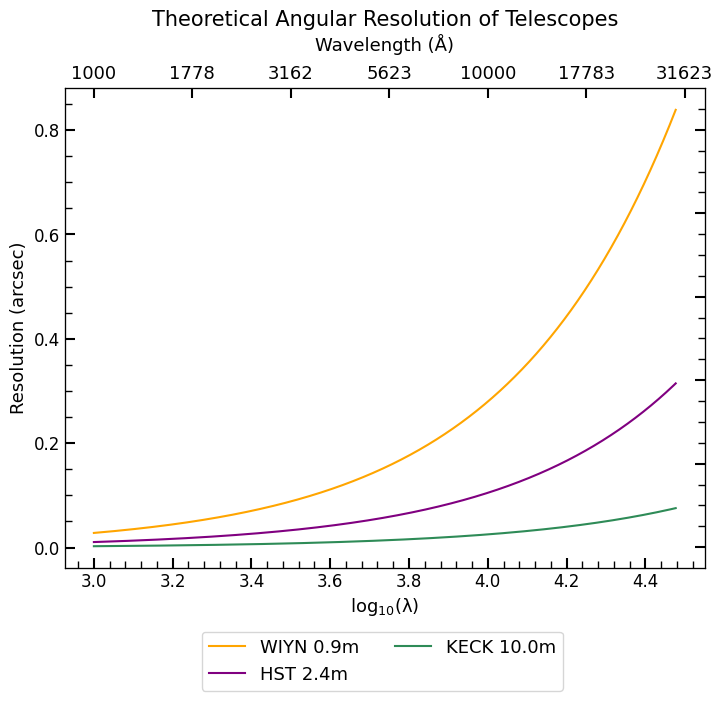

In [ ]:
fig = plt.figure()
ax0 = fig.add_axes([0,0,1,1])

ax0.plot(np.log10(lam),theta_WIYN, color='orange', label = 'WIYN 0.9m')
ax0.plot(np.log10(lam),theta_HST, color='purple', label = 'HST 2.4m')
ax0.plot(np.log10(lam),theta_KECK, color='seagreen', label = 'KECK 10.0m')

## Give the plot its basics
ax0.set_xlabel("log$_{10}$(λ)",fontsize=13) ## x-axis = log10 of wavelength
ax0.set_ylabel("Resolution (arcsec)",fontsize=13)  ## y-axis = angular resolution
# ax0.legend(loc="upper left",fontsize=13)
ax0.set_title("Theoretical Angular Resolution of Telescopes",fontsize=15)

## Let's adjus the tick marks ##
ax0.tick_params(labelsize = 12, direction='in') ## adjust tick mark parameters
ax0.xaxis.set_minor_locator(AutoMinorLocator(5)) ## include minor tick marks
ax0.yaxis.set_minor_locator(AutoMinorLocator(4))
ax0.tick_params(which='major', length=7,width=1.5,direction='in') ## adjust the length of major tick marks
ax0.tick_params(axis = 'x',which='minor', length=5,width=1,direction='in') ## adjust the length of minor tick marks
ax0.tick_params(axis = 'y',which='minor', length=5,width=1,direction='in')
ax0.tick_params(which='major', length=7,width=1.5,direction='in')

## Let's say you want tick marks on the other x and y axes
#### they can represent different things! In this example, the bottom x-axis is wavelenght in log_10
#### and the top x-axis is the corresponding wavelength in Angstrom

## mirror the x axis
ax1 = ax0.twiny()
ax1.tick_params(which='major', length=7,width=1.5,direction='in')
ax1.tick_params(labelsize = 13, direction='in')
ax1.set_xticks(np.array([3.00,3.25,3.50,3.75,4.00,4.25,4.50]))
ax1.set_xbound(ax0.get_xbound())
ax1.set_xticklabels([(round(10**lam_ang)) for lam_ang in np.array([3.00,3.25,3.50,3.75,4.00,4.25,4.50])])
ax1.set_xlabel("Wavelength (Å)",labelpad=10, fontsize=13)

## mirror the y-axis
ax2 = ax0.twinx()
ax2.tick_params(labelsize = 24, direction='in')
ax2.set_ylim(-0.25,0.9)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
ax2.tick_params(which='minor', length=5,width=1,direction='in')
ax2.tick_params(which='major', length=7,width=1.5,direction='in')

## We can also set the legend to be outside of the plot like in plt!
ax0.legend(ncol=2,loc="lower left",fontsize=13,bbox_to_anchor=(0.2,-0.275))

### Subplots

#### Using ax allows you to use gridspec (https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html), a versatile tool for creating subplots.

In [ ]:
## Let's generate some data for this section


### population 1
np.random.seed(1240)
rand_hist1 = np.random.randint(1,high= 110, size = 100)

### population 2
np.random.seed(87)
rand_hist2 = np.random.randint(1,high= 110, size = 100)

list1 = [rand_hist1,rand_hist2]

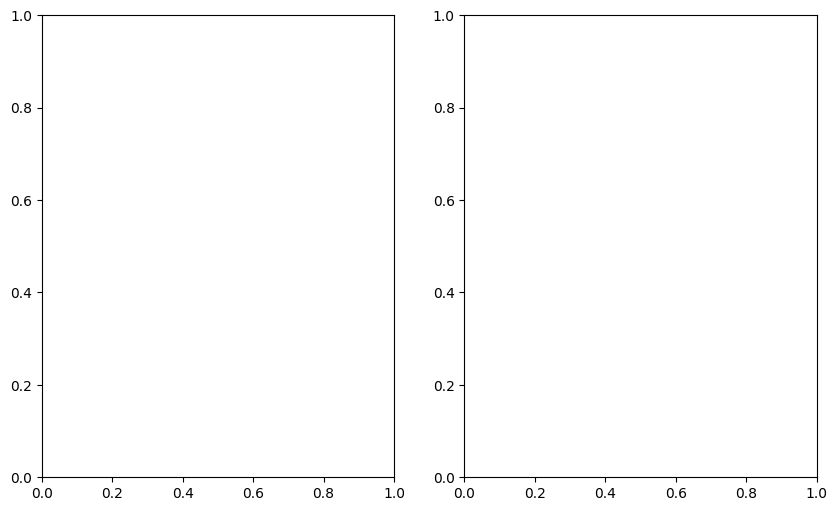

In [ ]:
fig = plt.figure(figsize = (10,6)) ## set the size of the overall figure
grid = gridspec.GridSpec(ncols=2, nrows=1, figure = fig) ## set number of subplots

## set up subplots
ax0 = fig.add_subplot(grid[0,0])
ax1 = fig.add_subplot(grid[0,1])


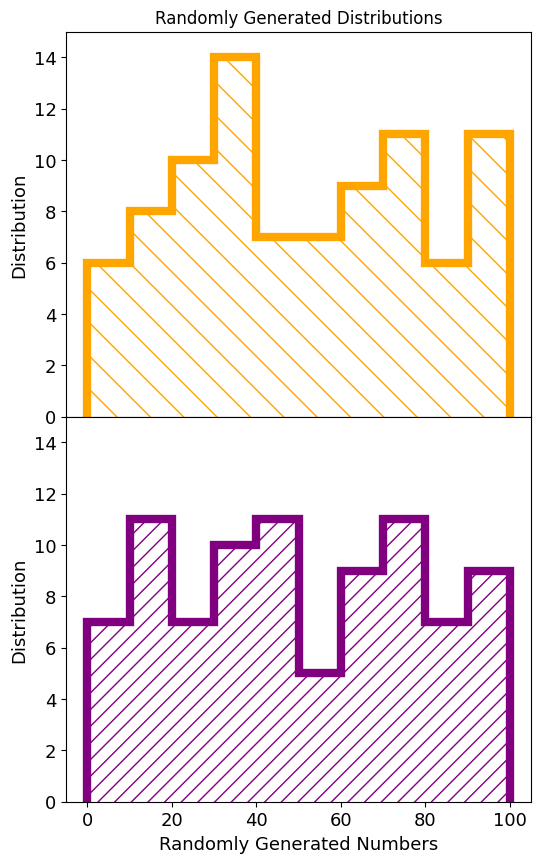

In [ ]:
fig2 = plt.figure(figsize = (6,10)) ## set the size of the overall figure
grid = gridspec.GridSpec(ncols=1, nrows=2, figure = fig2) ## set number of subplots

## set up subplots
ax0 = fig2.add_subplot(grid[0,0])
ax1 = fig2.add_subplot(grid[1,0])
ax = [ax0,ax1]

## when doing subplots, I find it more efficient to loop through the suplots, especially
### with lots of data to plot.
### changes that apply to all subplots should be in the loop:

## set up colors to loop through
color = ["orange", "purple"]
## set up hatch for histogram
hatch = ["\\", "//"]

## Set up loop
for i in range(len(ax)):
  ax[i].hist(list1[i],bins = np.arange(0,101,10),histtype='step',lw=6,color = color[i],hatch = hatch[i]) ## bins changes the resolution --> larger bins = smaller resolution
  ax[i].tick_params(labelsize=13)
  ax[i].set_xlabel("Randomly Generated Numbers",fontsize = 13)
  ax[i].set_ylabel("Distribution",fontsize = 13)
  ax[i].set_ylim(0,15)
  ax[i].set_xlim(-5,105)

### individual changes should be outside the loop
ax[0].set_title("Randomly Generated Distributions")

## If plots have the same x-axes, you can combine them
fig2.subplots_adjust(hspace=0)
ax0.xaxis.set_major_locator(ticker.NullLocator()) ## gets rid of x-axis of top plot


### Other Cool Things

#### Color Maps

##### We can create color maps using the matplib function (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

In [ ]:
## Lets generate data for this section
from matplotlib import colormaps
import matplotlib.cm as cm

### x
np.random.seed(1240)
NII = (np.random.randint(-80,high= 25, size = 25))/100

### y
np.random.seed(87)
OIII = (np.random.randint(4,high= 13, size = 25))/10

### color scale
np.random.seed(87)
color_scale = (np.random.randint(830,high= 890, size = 25))/100

<ipython-input-150-6b2805c3e0de>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('viridis')  ## choose color scheme


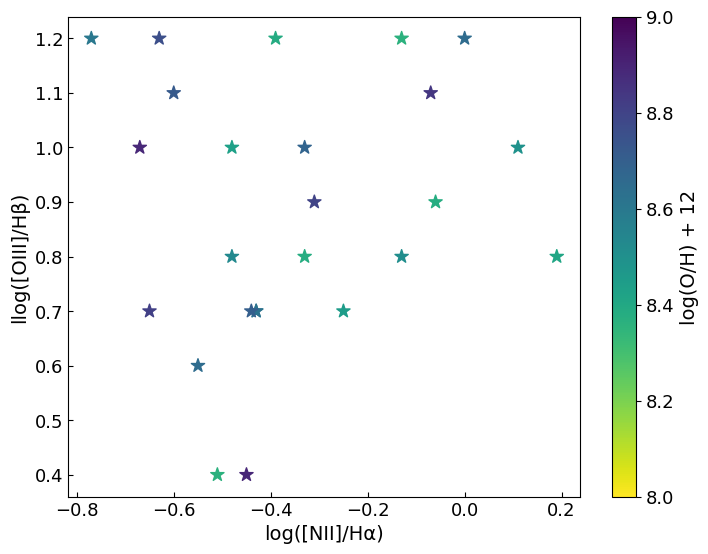

In [ ]:
orig_map=plt.cm.get_cmap('viridis')  ## choose color scheme
reversed_map = orig_map.reversed() ## you can flip the order, in this example higher values are darker colors

fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])

## create the color bar
cax = ax.scatter(NII,OIII,c = color_scale,s = 100,marker = '*',cmap=reversed_map,vmin=8.0, vmax=9.0)
cbar1 = plt.colorbar(cax,orientation="vertical")
cbar1.ax.tick_params(labelsize=13)
cbar1.set_label(label="log(O/H) + 12",size = 14)

ax.set_xlabel("log([NII]/H\u03B1)",fontsize=14) ## you can introduce special characters like greek letters with their unicode
ax.set_ylabel("llog([OIII]/H\u03B2)",fontsize =14)
ax.tick_params(labelsize = 13, direction='in')


### Other Resources

1.   Inset Plots - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.inset_axes.html

2.   3D Plots - https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/

3.   Animations - https://matplotlib.org/stable/users/explain/animations/animations.html



## Explore all you can do with Matplotlib here: https://matplotlib.org/stable/gallery/index.html
